### Importing libraries

In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.sparse import coo_matrix
np.set_printoptions(threshold=np.inf)
# from numpy.linalg import inv

### Read in csv file

In [2]:
file = pd.read_csv('chicago-taxi-rides.csv')

### 1. Plot

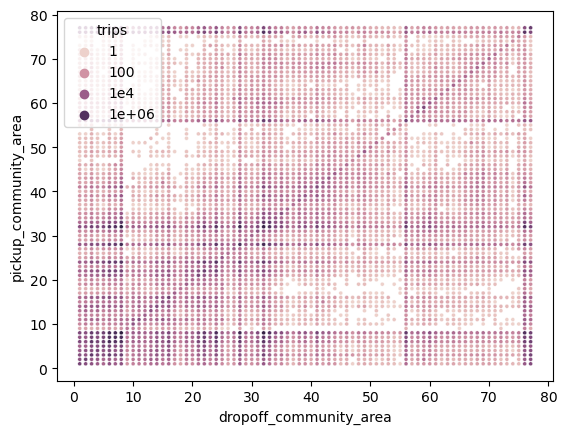

In [12]:
sb.scatterplot(x='dropoff_community_area',y='pickup_community_area',data=file,hue='trips',hue_norm=LogNorm(), s = 8)

plt.show()



### 2. Read data as matrix

In [3]:
# removing NaN datapoints
file_cleaned = file.dropna()

# getting row, column, and value from df
row = np.array(file_cleaned['dropoff_community_area'].tolist()) - 1
col = np.array(file_cleaned['pickup_community_area'].tolist()) - 1
val = np.array(file_cleaned['trips'].tolist()) - 1

# read df as a matrix
data = coo_matrix((val, (row, col)), shape=(77, 77)).toarray()
print(data)

[[  110696    28109    41574     9767     5227    63660    21552    70133
        27      216      736      188     1112     3211      325     2620
        25        8       98       55     1183     4872      155     9799
        29       10       31    14890       59       43      303    34670
      2026      141      104       15        8       27      115        8
       453       37       31       31       10       17        0        1
         5        1        3        2        0        0        2     6101
        12       27       50       64       18        7        5        3
         4       20        5        9        9        5        7        8
         0        0        1    35847    69416]
 [   40534   169483    22063    28752     5751    25555    10920    37971
        36      627     1399      830     4465     7500      606     3805
        56       10      242       56     1603     3884      186     5646
        51       14       31     8612       34       95      137

### 3. TraffickRank Algorithm

In [8]:
# input: data is a matrix of ranks
def getrank (weight, rank, beta, iterations):
    # initialize ranks if not already did
    
    # algorithm
    result = rank
    for i in range(iterations):
        result = beta * np.matmul(weight, result.transpose()) + (1- beta) * np.full((1,77), 1/77)
    return result
    
    
# calculate initial rank:
weight = data / np.sum(data, axis=1)[np.newaxis, :]
initial = np.full((77, 77), 1/77)
# print(len(initial))
# print(len(weight))

print(getrank(weight, initial, 0.85, 6))
    

[[0.00365956 0.00401813 0.00484177 0.00382898 0.00369827 0.00797379
  0.00669939 0.01997276 0.00283058 0.00334587 0.00343643 0.00306178
  0.00326208 0.00346227 0.00351311 0.00383497 0.00308246 0.00290397
  0.00313327 0.00290394 0.00347421 0.0043702  0.00305629 0.00599788
  0.00336387 0.00291771 0.00297254 0.00961891 0.00295447 0.00306172
  0.00315742 0.01477674 0.00512393 0.00318975 0.00349623 0.00299412
  0.00307171 0.00326653 0.00328071 0.00309331 0.00426381 0.00335311
  0.00361543 0.00386093 0.00312022 0.00321057 0.00296151 0.00331265
  0.00419793 0.00310029 0.00337261 0.00287926 0.00317609 0.00301753
  0.00297693 0.00489134 0.00298338 0.00322269 0.00433218 0.00303583
  0.00312396 0.00295085 0.00297821 0.00311171 0.00297136 0.00312938
  0.0031669  0.00322393 0.00342687 0.00314011 0.00317745 0.0028647
  0.00303521 0.00282197 0.00293509 0.00605845 0.00430246]
 [0.00436091 0.00485958 0.00595437 0.00458958 0.00439844 0.01011604
  0.00837092 0.0259839  0.00322572 0.00394519 0.00407084 0.

### References

#### [1] https://www.tutorialspoint.com/create-a-scatter-plot-with-seaborn-python-pandas
#### [2] https://stackoverflow.com/questions/61668759/create-a-scatter-plot-from-a-csv-file-with-categories
#### [3] https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
#### [4] https://stackoverflow.com/questions/4918425/subtract-a-value-from-every-number-in-a-list-in-python
#### [5] https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html
#### [6] 
#### [7] 
#### [8] 
#### [9] 
#### [10] 
#### [11] 
#### [12] 
#### [13] 
#### [14] 
#### [15] 
#### [16] 
#### [17]